# Problem Statement

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

## Objective

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour (**KNN**).




**K-Nearest Neighbors** is a supervised learning algorithm. KNN is a method of classifying cases based on thier similarity to other cases. Cases that are near to each other are assigned to a particular class based on thier similarity and disimilarity. Similarity and dissimilarity can be identified by ecludian distance between two class labels.


### K-Nearest Neighbors algorithm graph.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png">


In this case, we have data points of Class A and B. We want to predict what class ? (test data point) belong to. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we might obtain a prediction of Class A.


## Let's load required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

1. Target field : **custcat** -It has four possible values that correspond to the four customer groups, as follows:
        1- Basic Service
        2- E-Service
        3- Plus Service
        4- Total Service
2. Features
        1. Region
        2. Tenure
        3. Age
        4. Martila Status
        5. Address
        6. Income
        7. Education
        8. Employment
        9. Retired
        10. Gender
        11. Reside


### Load Data From CSV File


In [2]:
df = pd.read_csv('D:\ML\TeleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.tail()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


## Exploratory Data Analysis

In [4]:
df.shape

(1000, 12)

In [5]:
df[df.duplicated()]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat


In [6]:
df.isnull()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [9]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


#### Let’s see how many of each class is in our data set


In [10]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


In [11]:
df['gender'].value_counts()

1    517
0    483
Name: gender, dtype: int64

<AxesSubplot:>

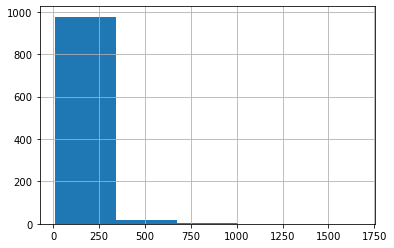

In [12]:
df['income'].hist(bins = 5)

### Feature set


In [13]:
correlation = df.corr()
correlation

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


In [14]:
matrix = np.triu(correlation)
matrix

array([[ 1.        ,  0.01638842,  0.015034  , -0.08063737,  0.01032012,
         0.02376468, -0.05795196,  0.01633497,  0.00559503,  0.05059609,
        -0.06515809, -0.02377065],
       [ 0.        ,  1.        ,  0.49021726,  0.15417137,  0.52295217,
         0.24291222, -0.10979683,  0.52028842,  0.17114338,  0.02353288,
        -0.0365925 ,  0.16669056],
       [ 0.        ,  0.        ,  1.        , -0.01443287,  0.660435  ,
         0.32794777, -0.15485696,  0.67004699,  0.42943998, -0.01141912,
        -0.25499327,  0.05690893],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.01205123,
        -0.04398409,  0.00139966, -0.00289087, -0.07810866,  0.00834524,
         0.62599878,  0.08383571],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.22678101, -0.12833034,  0.46329092,  0.29250268,  0.0083632 ,
        -0.20164508,  0.06791316],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  

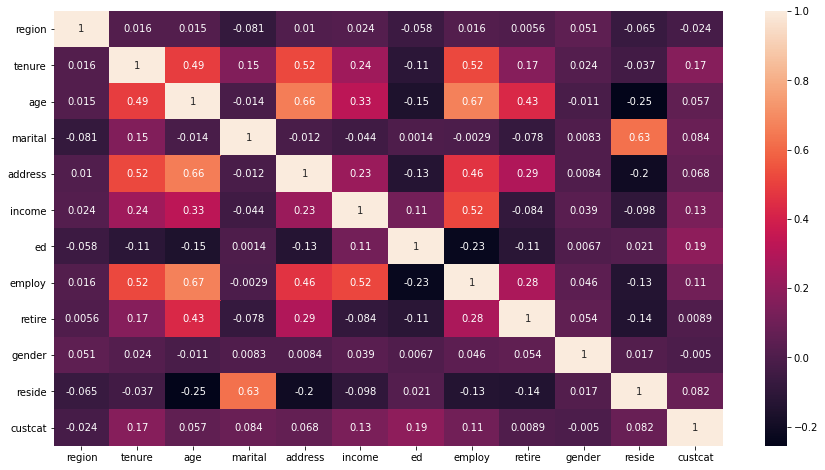

In [15]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.heatmap(correlation, xticklabels = df.columns, yticklabels = df.columns, annot = True)
plt.show()

Let's define feature sets, X:


In [16]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [17]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values   #.astype(float)
type(X)

numpy.ndarray

What are our labels?


In [18]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data


As we have many features on different scales. So we need to convert the scale of these features and bring all the data in a single measurable scale so that we can apply KNN algorithm.


In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification - KNN

<h3>K nearest neighbor (KNN)</h3>


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [21]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=1 for now:


In [22]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicting

We can use the model to make predictions on the test set:


In [23]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

### Model Evaluation Metrics : Accuracy Calculation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [24]:
from sklearn import metrics
Train_Acc_1 = metrics.accuracy_score(y_train, neigh.predict(X_train))
Test_Acc_1 = metrics.accuracy_score(y_test, y_hat)
print("Train set Accuracy: ", Train_Acc_1)
print("Test set Accuracy: ", Test_Acc_1)

Train set Accuracy:  1.0
Test set Accuracy:  0.3


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [25]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc, "\n", std_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ] 
 [0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


#### Plot the model accuracy for a different number of neighbors.


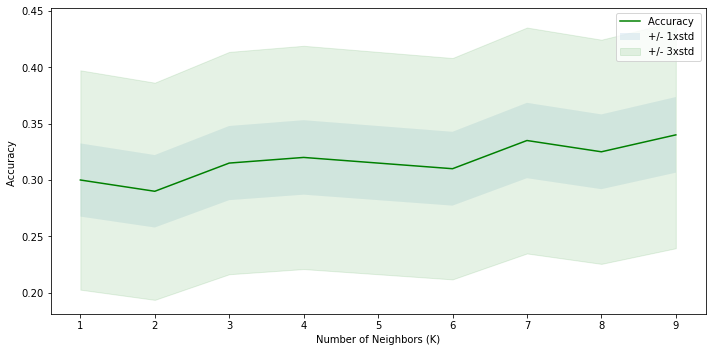

In [26]:
plt.figure(figsize = (10,5))
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( f"The best accuracy was {mean_acc.max()} with k = {mean_acc.argmax()+1}") 

The best accuracy was 0.34 with k = 9
